In [1]:
#project hr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data//WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()
display(df.loc[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [4]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [28]:
pd.options.display.float_format = "{:,.2f}".format
des = df.describe()
lst = []

for x in des.columns:
    if des.loc["std", x] == 0:
        lst.append(x)
lst

['EmployeeCount', 'StandardHours']

In [29]:
num_col = df.describe().columns
cat_columns = list(set(df.columns) - set(num_col))
cat_columns
col_drop = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = list( set(num_col) - set(col_drop))


<Axes: >

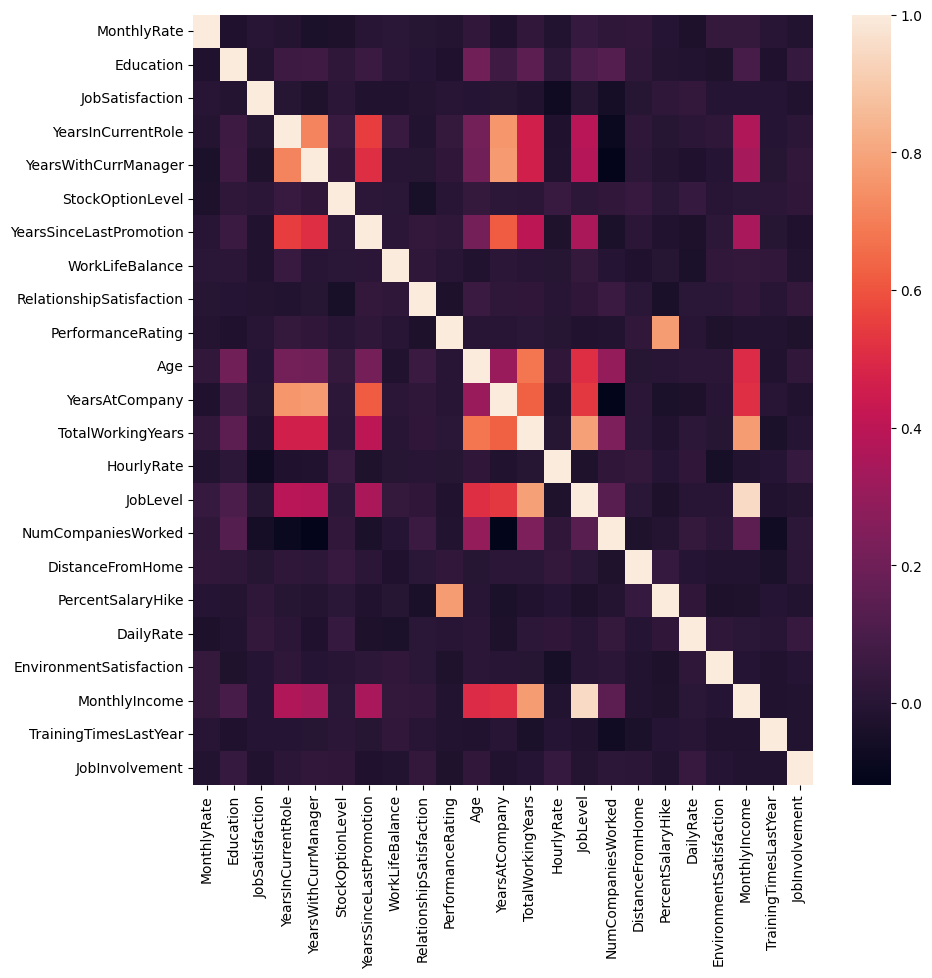

In [30]:
crm = df[col_numerical].corr()
plt.figure(figsize=(10,10))
sns.heatmap(crm)

In [31]:
mask = np.zeros_like(df[col_numerical].corr())
mask = mask == 1 
mask[np.triu_indices_from(mask)] = True


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,

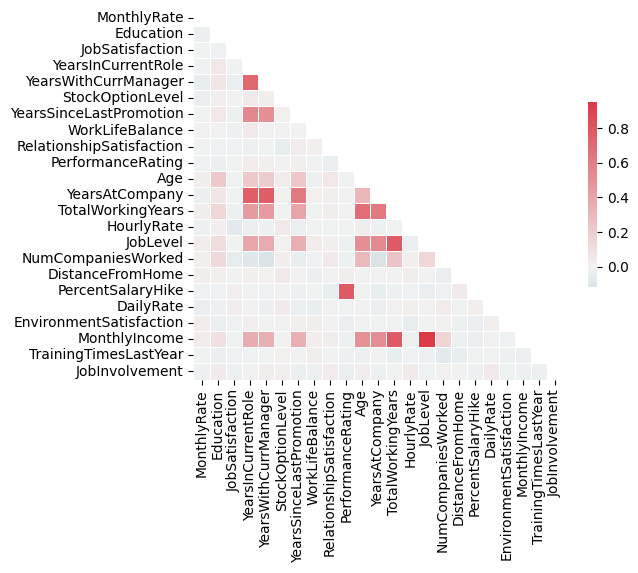

In [52]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap with mask and correct aspect ratio
sns.heatmap(crm, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

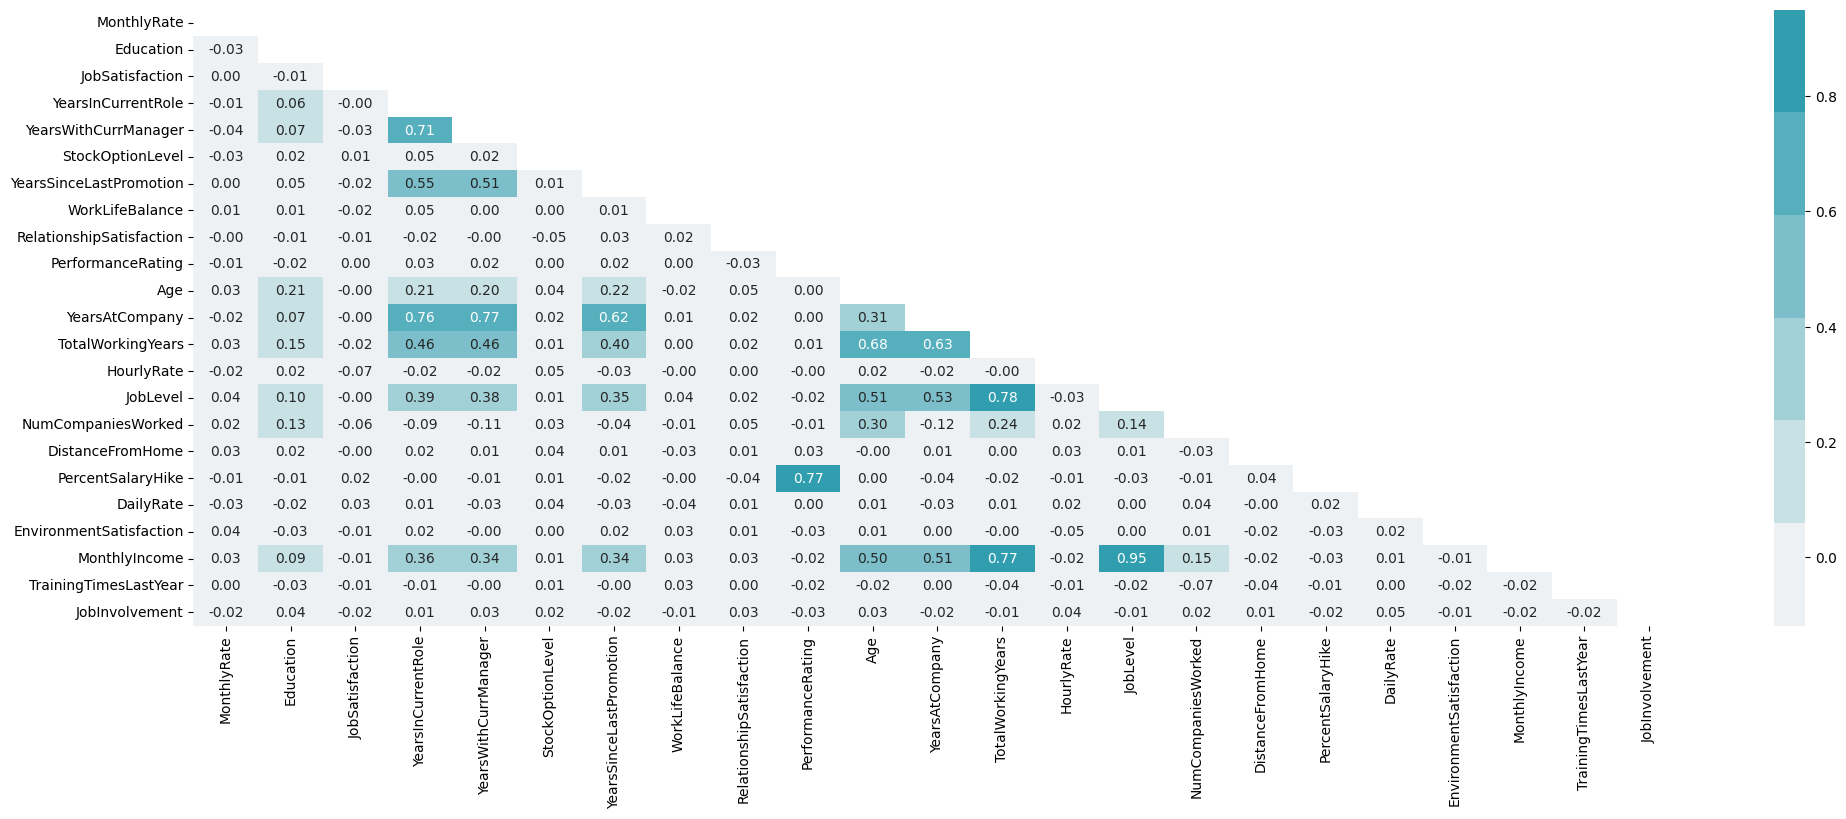

In [57]:
plt.figure(figsize=(24,8))

# Mask for the upper triangle


# Generate a custom diverging colormap
#cmap = sns.diverging_palette(10, 220, as_cmap=True)
cmap = sns.light_palette((210, 90, 60), input="husl")

# Heatmap with mask
sns.heatmap(df[col_numerical].corr(), mask = mask,cmap=cmap,  annot=True, fmt=".2f");

In [69]:
df["Attrition"].unique()
to_num = {"Yes" : 0, "No" : 1}
df["nmp"] = df["Attrition"].map(to_num)


,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,Over18_Y,...,OverTime_Yes,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,False,True,False,False,False,False,False,False,True,True,...,True,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,True,False,True,...,True,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,True,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
1466,False,False,False,True,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
1467,False,True,False,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
1468,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False


In [96]:
df_ja = df[df.Attrition == "Yes"]
len(df_ja)
df_ne = df[df.Attrition == "No"]
len(df_ja)
df_ja_down = df_ja.sample(replace=False,
                                    n=200,
                                    random_state=42)

df_ne_down = df_ne.sample(replace=False,
                                    n=200,
                                    random_state=42)


In [ ]:
#cat_columns.remove("Attrition")
cat_columns
df_cat = pd.get_dummies(df[cat_columns])
df_cat

In [73]:
X = pd.concat((df[col_numerical], df_cat), axis=1)
y = df["nmp"]


,MonthlyRate,Education,JobSatisfaction,YearsInCurrentRole,YearsWithCurrManager,StockOptionLevel,YearsSinceLastPromotion,WorkLifeBalance,RelationshipSatisfaction,PerformanceRating,...,OverTime_Yes,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,19479,2,4,4,5,0,0,1,1,3,...,True,False,False,False,False,False,False,False,True,False
1,24907,1,2,7,7,1,1,3,4,4,...,False,False,False,False,False,False,False,True,False,False
2,2396,2,3,0,0,0,0,3,2,3,...,True,False,False,True,False,False,False,False,False,False
3,23159,4,3,7,0,0,3,3,3,3,...,True,False,False,False,False,False,False,True,False,False
4,16632,1,2,2,2,1,2,3,4,3,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,12290,2,4,2,3,1,0,3,3,3,...,False,False,False,True,False,False,False,False,False,False
1466,21457,1,1,7,7,1,1,3,1,3,...,False,True,False,False,False,False,False,False,False,False
1467,5174,3,2,2,3,1,0,3,2,4,...,True,False,False,False,False,True,False,False,False,False
1468,13243,3,2,6,8,0,0,2,4,3,...,False,False,False,False,False,False,False,False,True,False


In [84]:
print(y.value_counts())
X.info()

nmp
1    1233
0     237
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   MonthlyRate                        1470 non-null   int64
 1   Education                          1470 non-null   int64
 2   JobSatisfaction                    1470 non-null   int64
 3   YearsInCurrentRole                 1470 non-null   int64
 4   YearsWithCurrManager               1470 non-null   int64
 5   StockOptionLevel                   1470 non-null   int64
 6   YearsSinceLastPromotion            1470 non-null   int64
 7   WorkLifeBalance                    1470 non-null   int64
 8   RelationshipSatisfaction           1470 non-null   int64
 9   PerformanceRating                  1470 non-null   int64
 10  Age                                1470 non-null   int64
 11  YearsAtCompany                  

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
clf.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, precision_score, recall_score
y_test_pred = clf.predict(X_test)


In [80]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       981

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [81]:
confusion_matrix(y_train, clf.predict(X_train))

array([[195,   0],
       [  0, 981]], dtype=int64)

In [86]:
a = y_test
b = y_test_pred
print(confusion_matrix(a,b))
print(classification_report(a,b))
print(precision_score(a,b))
print(recall_score(a,b))
y_test.value_counts()

[[  9  33]
 [ 27 225]]
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        42
           1       0.87      0.89      0.88       252

    accuracy                           0.80       294
   macro avg       0.56      0.55      0.56       294
weighted avg       0.78      0.80      0.79       294

0.872093023255814
0.8928571428571429


nmp
1    252
0     42
Name: count, dtype: int64